In [18]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import shutup; shutup.please()
from decimal import Decimal
from fractions import Fraction


## Extract the Data

In [19]:
Dow_df = pd.read_csv('../../csv/Dow_Jones_daily.csv')
Dow_df["Average_Dow"]= Dow_df[[" Open_Dow"," Close_Dow"]].mean(axis=1)
Nasdaq_df= pd.read_csv('../../csv/Nasdaq_daily.csv')
Nasdaq_df["Average_Nasdaq"]= Nasdaq_df[[" Open_Nasdaq"," Close_Nasdaq"]].mean(axis=1)
sp_df = pd.read_csv('../../csv/S&P_daily.csv')
sp_df["Average_S&P"]= sp_df[[" Open_S&P"," Close_S&P"]].mean(axis=1)

In [20]:
import functools as ft
dfs= [Dow_df,Nasdaq_df,sp_df]
indexes = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
indexes

,Date,Open_Dow,High_Dow,Low_Dow,Close_Dow,Average_Dow,Open_Nasdaq,High_Nasdaq,Low_Nasdaq,Close_Nasdaq,Average_Nasdaq,Open_S&P,High_S&P,Low_S&P,Close_S&P,Average_S&P
0,8/22/23,44048.41,44052.77,43704.59,43746.74,43897.575,13593.94,13598.76,13484.38,13505.87,13549.905,4415.33,4418.59,4382.77,4387.55,4401.440
1,8/21/23,43714.83,43954.95,43495.57,43873.30,43794.065,13347.26,13516.86,13325.59,13497.59,13422.425,4380.28,4407.55,4360.30,4399.77,4390.025
2,8/18/23,43226.74,43724.70,43226.74,43606.81,43416.775,13190.02,13335.87,13161.76,13290.78,13240.400,4344.88,4381.82,4335.31,4369.71,4357.295
3,8/17/23,44076.54,44106.83,43535.83,43582.21,43829.375,13527.30,13535.09,13303.44,13316.93,13422.115,4416.32,4421.17,4364.83,4370.36,4393.340
4,8/16/23,44236.07,44422.74,43945.35,43951.78,44093.925,13593.17,13644.32,13473.03,13474.63,13533.900,4433.79,4449.95,4403.55,4404.33,4419.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,1/8/08,14181.98,14328.19,13901.54,13915.82,14048.900,2508.00,2527.42,2440.51,2440.51,2474.255,1422.15,1430.28,1388.30,1390.19,1406.170
3932,1/7/08,14154.51,14265.25,14051.74,14181.97,14168.240,2513.10,2521.62,2471.23,2499.46,2506.280,1417.97,1423.87,1403.45,1416.18,1417.075
3933,1/4/08,14154.51,14524.53,14150.16,14154.51,14154.510,2571.08,2571.08,2502.68,2504.65,2537.865,1411.63,1444.01,1411.19,1411.63,1411.630
3934,1/3/08,14524.54,14632.08,14494.32,14524.54,14524.540,2612.40,2624.27,2592.18,2602.68,2607.540,1447.16,1456.80,1443.73,1447.16,1447.160


In [21]:
indexes = indexes.drop(columns=[' Open_Dow', ' High_Dow', ' Low_Dow', ' Close_Dow',' Open_Nasdaq', ' High_Nasdaq', ' Low_Nasdaq',' Close_Nasdaq',' Open_S&P', ' High_S&P', ' Low_S&P',' Close_S&P'])

In [22]:
indexes

,Date,Average_Dow,Average_Nasdaq,Average_S&P
0,8/22/23,43897.575,13549.905,4401.440
1,8/21/23,43794.065,13422.425,4390.025
2,8/18/23,43416.775,13240.400,4357.295
3,8/17/23,43829.375,13422.115,4393.340
4,8/16/23,44093.925,13533.900,4419.060
...,...,...,...,...
3931,1/8/08,14048.900,2474.255,1406.170
3932,1/7/08,14168.240,2506.280,1417.075
3933,1/4/08,14154.510,2537.865,1411.630
3934,1/3/08,14524.540,2607.540,1447.160


In [23]:
fedfunds_df = pd.read_csv('../../csv/FedFundsDaily.csv')
inflation_df = pd.read_csv('../../csv/InflationRateDaily.csv')
# macro = pd.merge(fedfunds_df,inflation_df, on= "Date",how="left")
macro = pd.merge(fedfunds_df,inflation_df, on= "Date", how= "left")
macro.dropna()
macro

,Date,DFF,Inflation_Rate
0,1/1/08,3.06,NaN
1,1/2/08,4.11,2.32
2,1/3/08,4.25,2.33
3,1/4/08,4.18,2.32
4,1/5/08,4.18,NaN
...,...,...,...
5708,8/18/23,5.33,2.32
5709,8/19/23,5.33,NaN
5710,8/20/23,5.33,NaN
5711,8/21/23,5.33,2.34


In [24]:
macro_index = pd.merge(macro,indexes,on="Date", how= "left")
macro_index=macro_index.dropna()
macro_index.to_csv("../../CleanedCSVs/Macro_withavgIndex.csv")

In [25]:
macro_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 1 to 5712
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3936 non-null   object 
 1   DFF             3936 non-null   float64
 2   Inflation_Rate  3936 non-null   object 
 3   Average_Dow     3936 non-null   float64
 4   Average_Nasdaq  3936 non-null   float64
 5   Average_S&P     3936 non-null   float64
dtypes: float64(4), object(2)
memory usage: 215.2+ KB


In [26]:
# macro_index = macro_index.apply(pd.to_numeric,errors='coerce')
macro_index['Inflation_Rate'] = pd.to_numeric(macro_index['Inflation_Rate'], errors='coerce')


In [27]:
macro_index.dtypes

Date               object
DFF               float64
Inflation_Rate    float64
Average_Dow       float64
Average_Nasdaq    float64
Average_S&P       float64
dtype: object

In [28]:
macro_index_cleaned = macro_index.dropna()

In [29]:
macro_index.columns

Index(['Date', 'DFF', 'Inflation_Rate', 'Average_Dow', 'Average_Nasdaq',
       'Average_S&P'],
      dtype='object')

the  correlation between the Average Nasdaq and inflation rate is  0.25


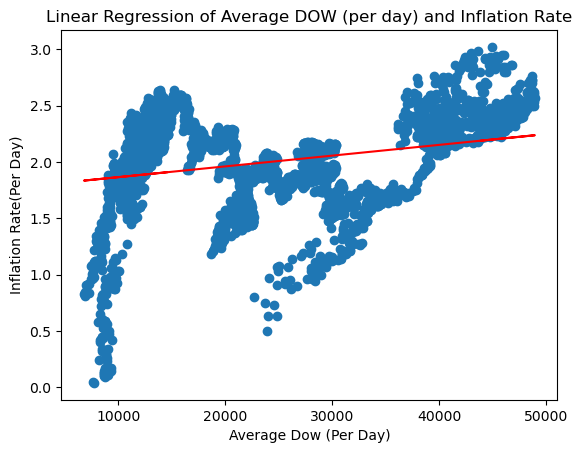

In [30]:
import scipy.stats as st
from scipy.stats import linregress
x_axis= macro_index_cleaned['Average_Dow']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average Nasdaq and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (per day) and Inflation Rate")
plt.xlabel('Average Dow (Per Day)')
plt.ylabel('Inflation Rate(Per Day)')
plt.savefig("figures/AverageDowvsInflation.png")
plt.show()

the  correlation between the Average S&P and inflation rate is  0.23


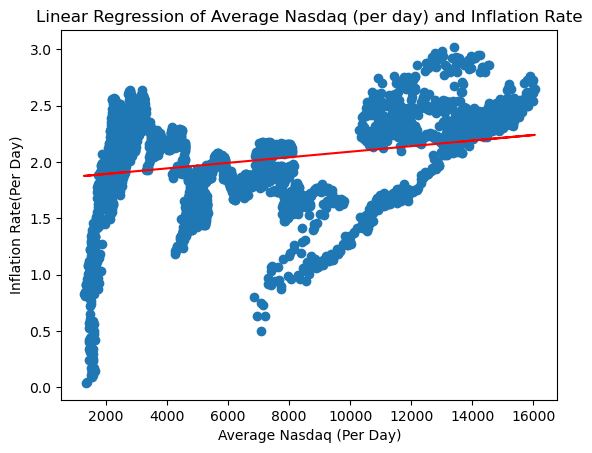

<Figure size 640x480 with 0 Axes>

In [31]:
import scipy.stats as st
x_axis= macro_index_cleaned['Average_Nasdaq']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average S&P and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Nasdaq (per day) and Inflation Rate")
plt.xlabel('Average Nasdaq (Per Day)')
plt.ylabel('Inflation Rate(Per Day)')
plt.show()
plt.savefig("figures/AverageNasdaqvsInflation.png")

the  correlation between the Average S&P and inflation rate is  0.25


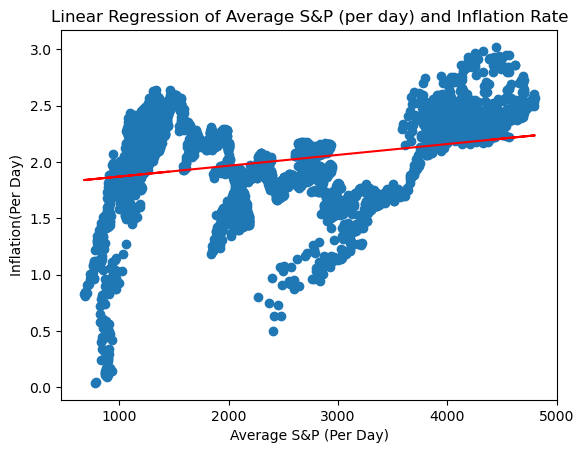

In [32]:

x_axis= macro_index_cleaned['Average_S&P']
y_axis=macro_index_cleaned['Inflation_Rate']
print(f'the  correlation between the Average S&P and inflation rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (per day) and Inflation Rate")
plt.xlabel('Average S&P (Per Day)')
plt.ylabel('Inflation(Per Day)')
plt.savefig("figures/AverageS&PvsInflation.png")
plt.show()

the  correlation between the Average DOW and FedFunds is  0.39


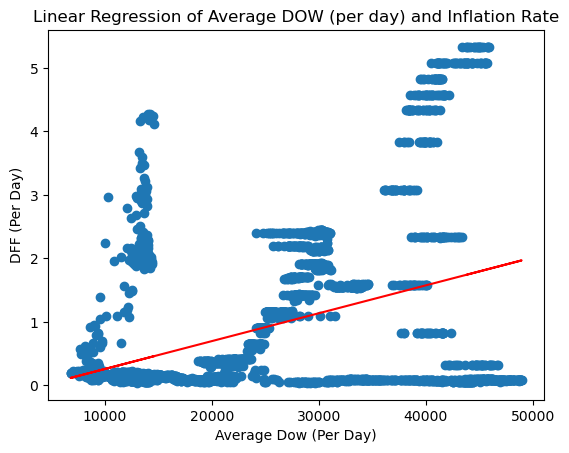

In [33]:
x_axis= macro_index_cleaned['Average_Dow']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average DOW and FedFunds is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (per day) and Inflation Rate")
plt.xlabel('Average Dow (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageDowvsDFFpng")
plt.show()

the  correlation between the Average Nasdaq and DFF is  0.35


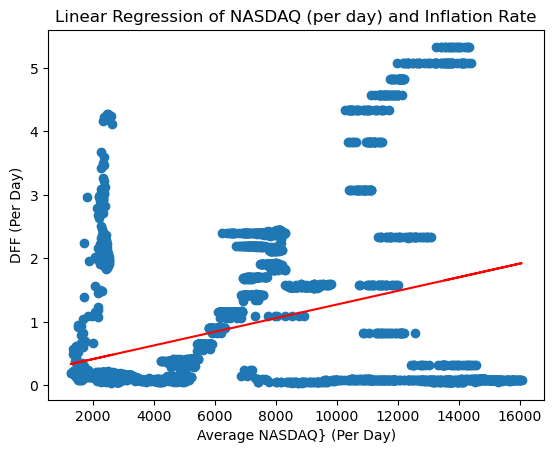

In [34]:
x_axis= macro_index_cleaned['Average_Nasdaq']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average Nasdaq and DFF is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of NASDAQ (per day) and Inflation Rate")
plt.xlabel('Average NASDAQ} (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageNasdaqvsDFF.png")
plt.show()

the  correlation between the Average S&P and FedFunds is  0.41


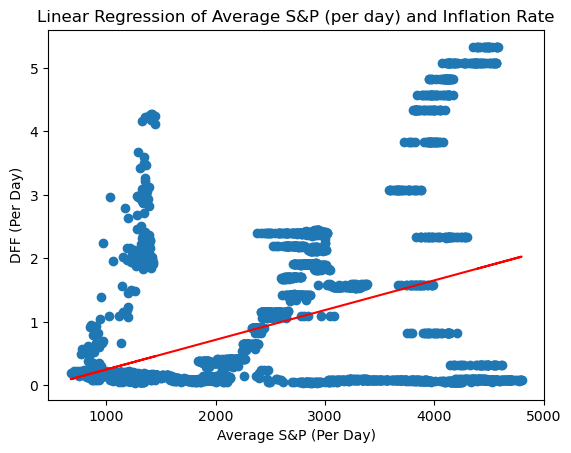

In [35]:
x_axis= macro_index_cleaned['Average_S&P']
y_axis=macro_index_cleaned['DFF']
print(f'the  correlation between the Average S&P and FedFunds is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (per day) and Inflation Rate")
plt.xlabel('Average S&P (Per Day)')
plt.ylabel('DFF (Per Day)')
plt.savefig("figures/AverageS&PvsInflation.png")
plt.show()